## Brain Tumor Prediction using CNN Model and study the comparasion with Logistic Regression

#### Name: Arya Rohan Rachamalla
#### Reg no: 3122256002002
#### Course: Machine Learning with Multi-Model Data

### CNN Model Implementation

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [2]:
train_dir = r"D:\Projects\ML mini project\archive (12)\Training"
test_dir = r"D:\Projects\ML mini project\archive (12)\Testing"

In [3]:
# Image parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Binary label mapping
def relabel_binary(base_dir):
    binary_dir = base_dir + "_binary"
    os.makedirs(binary_dir, exist_ok=True)
    for folder in os.listdir(base_dir):
        label = "tumor" if folder != "notumor" else "notumor"
        src = os.path.join(base_dir, folder)
        dst = os.path.join(binary_dir, label)
        os.makedirs(dst, exist_ok=True)
        for file in os.listdir(src):
            shutil.copy(os.path.join(src, file), dst)
    return binary_dir

In [4]:
train_binary = relabel_binary(train_dir)
test_binary = relabel_binary(test_dir)

# Data generators
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_binary,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_binary,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


# Construct the CNN model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Arya Rohan R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10


C:\Users\Arya Rohan R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 457ms/step - accuracy: 0.9116 - loss: 0.2322 - val_accuracy: 0.9268 - val_loss: 0.1881
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 463ms/step - accuracy: 0.9681 - loss: 0.1047 - val_accuracy: 0.9405 - val_loss: 0.1846
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 459ms/step - accuracy: 0.9753 - loss: 0.0730 - val_accuracy: 0.9626 - val_loss: 0.0926
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9816 - loss: 0.0512 - val_accuracy: 0.9603 - val_loss: 0.0887
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.9835 - loss: 0.0501 - val_accuracy: 0.9718 - val_loss: 0.0588
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 471ms/step - accuracy: 0.9876 - loss: 0.0359 - val_accuracy: 0.9817 - val_loss: 0.0442
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 461ms/step - accuracy: 0.9923 - loss: 0.0214 - val_accuracy: 0.9954 - val_loss: 0.0215
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9930 - loss: 0.0218 - val_a

In [7]:
loss, accuracy = model.evaluate(test_data)
print(f"Overall Test Accuracy: {accuracy:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9954 - loss: 0.0197
Overall Test Accuracy: 0.9954


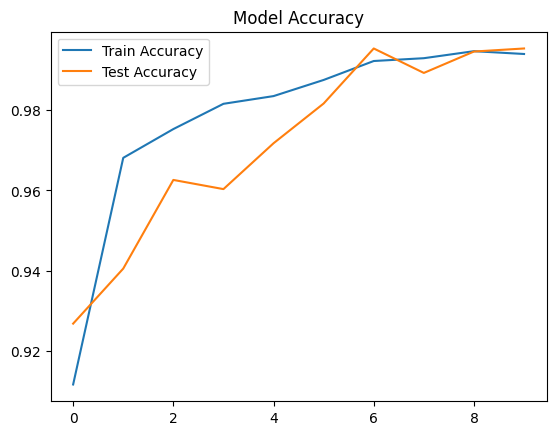

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [9]:
model.save("brain_tumor_model.h5")

In [10]:
from tensorflow.keras.models import load_model

model = load_model("brain_tumor_model.h5")  # Replace with your actual filename

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

IMG_SIZE = (150, 150)  # Same size used during training

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]
    
    # Interpret result
    result = "Tumor Detected" if prediction > 0.5 else "No Tumor Detected"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"{result} (Confidence: {confidence:.2f})")
    return result

Ends

In [12]:
# Example usage
img_path = "D:\Projects\ML mini project\Te-gl_0284.jpg"
predict_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Tumor Detected (Confidence: 1.00)


'Tumor Detected'

In [13]:
import matplotlib.pyplot as plt

def show_prediction(img_path):
    result = predict_image(img_path)
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(result)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tumor Detected (Confidence: 1.00)


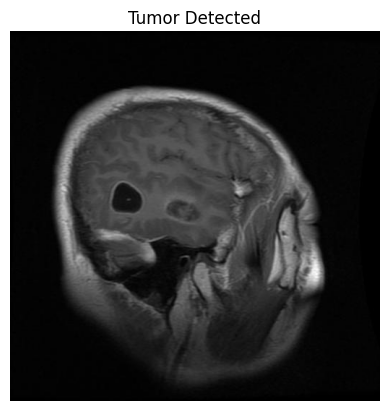

In [14]:
show_prediction(img_path)

In [15]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


### Logistic Regression Implementation

In [16]:
import numpy as np

def extract_data(generator):
    X, y = [], []
    for i in range(len(generator)):
        images, labels = generator[i]
        # Flatten each image to 1D vector
        images_flat = images.reshape(images.shape[0], -1)
        X.append(images_flat)
        y.append(labels)
    X = np.vstack(X)
    y = np.hstack(y)
    return X, y

X_train, y_train = extract_data(train_data)
X_test, y_test = extract_data(test_data)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["notumor", "tumor"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     notumor       0.98      0.99      0.99       405
       tumor       1.00      0.99      0.99       906

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311

Confusion Matrix:
[[402   3]
 [  9 897]]


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9908


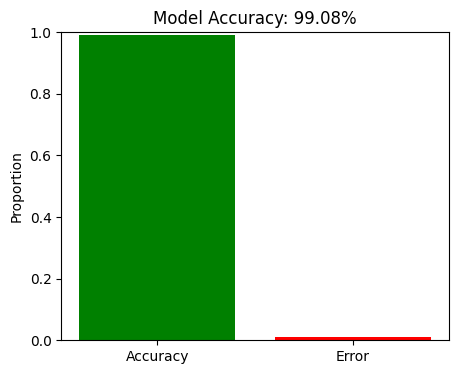

In [19]:
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

plt.figure(figsize=(5, 4))
plt.bar(["Accuracy", "Error"], [accuracy, error], color=["green", "red"])
plt.ylim(0, 1)
plt.title(f"Model Accuracy: {accuracy * 100:.2f}%")
plt.ylabel("Proportion")
plt.show()

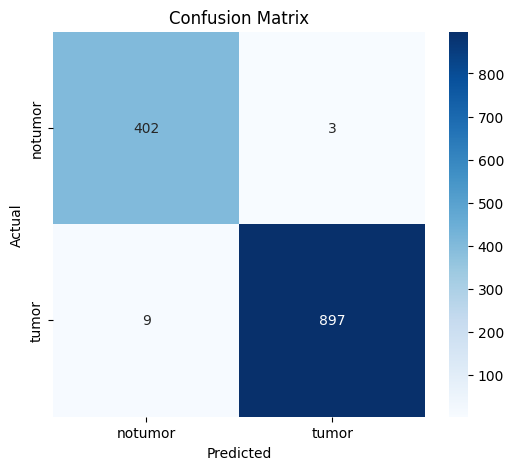

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["notumor", "tumor"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()